## SOEE3250/SOEE5675M/5116					

Inverse Theory

# Practical 10: Machine learning
In this practical we will explore two machine learning algorithms: support vector machines (a supervised algorithm) and K-means (unsupervised).


### Part 1: Support vector machines (SVM)

Load the relevant modules and the example labelled (breast cancer) dataset as below.
The dataset contains 569 cases each with 30 features or variables (i.e. a 569 x 30 matrix).
Each of the 30 variables represents a diagnostic, and the overall classification of cancer being either malignant or benign is given by a 0 or 1.

Inspect the structure of the dataset.

In [1]:
from sklearn import datasets 
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer = datasets.load_breast_cancer()

In [2]:
print (cancer.data.shape )

(569, 30)


In [3]:
print("Features: ", cancer.feature_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Labels:  ['malignant' 'benign']


In [5]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [6]:
# Here's the data for case 0:
print (cancer.data[0] )

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


Q1) Split the dataset into a (random) training part and a testing part, by running the code below.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

Q2) Plot features 0 and 1 (i.e. the first two variables) of the training set against each other, coloured by the target. 

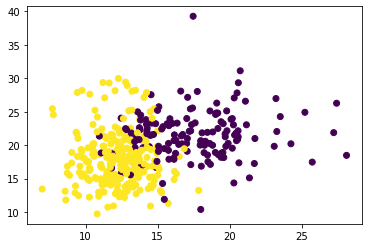

In [8]:
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1],c=y_train[:]);

Q3) Draw a best-fit dividing line through this 2D training dataset using the SVM algorithm.
Make a new scatter plot showing the output of the classification on this training dataset.

Accuracy based on training set: 0.8743718592964824


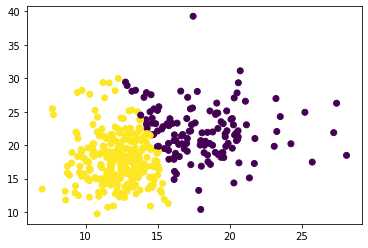

In [9]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train[:,0:2], y_train[:])

# How well did the algorithm do?
y_pred = clf.predict(X_train[:,0:2])
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1],c=y_pred)
print("Accuracy based on training set:",metrics.accuracy_score(y_train[:], y_pred))

Q4) Predict the response for the test dataset using features 0 and 1, and make a scatter plot showing the classification.


Accuracy: 0.9122807017543859


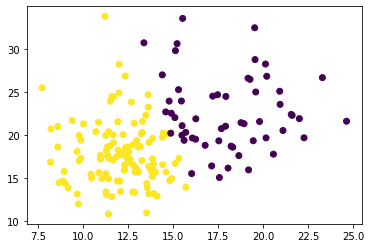

In [10]:
#Predict the response for test dataset
y_pred = clf.predict(X_test[:,0:2])
print("Accuracy:",metrics.accuracy_score(y_test[:], y_pred))
plt.figure()
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred)

Q5) Now redo the above analysis but for another 2D dataset, that of features 1 and 5.

- Make a scatter plot of the data, coloured by the target
- Run the SVM algorithm
- Predict the outcome for the training set and plot
- Predict the outcome for the test set and plot

Is this classifier better or worse than that based on features 0 and 1?

In [11]:
# To call the clf.fit function, you need to pass the features together. Here's how to do this:
Features_1_5= np.column_stack((X_train[:,1],X_train[:,5]))
# or
Features_1_5 = X_train[:,[1,5]]

Accuracy: 0.7386934673366834
Accuracy: 0.783625730994152


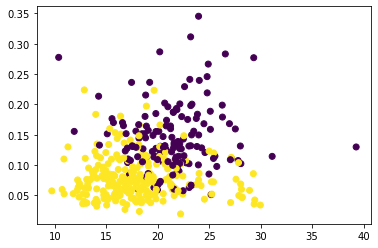

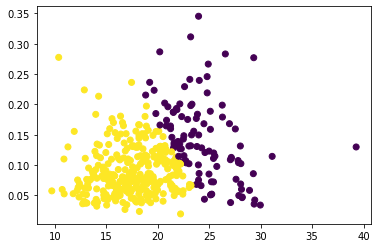

In [12]:
# To call the clf.fit function, you need to pass the features together. Here's how to do this:
Features_1_5= np.column_stack((X_train[:,1],X_train[:,5]))
# or
Features_1_5 = X_train[:,[1,5]]

plt.figure()
plt.scatter(X_train[:,1], X_train[:,5],c=y_train[:])

#Train the model using the training sets
clf.fit(Features_1_5,y_train[:])

#Predict the response for training dataset
y_pred = clf.predict(Features_1_5)
print("Accuracy:",metrics.accuracy_score(y_train[:], y_pred))
plt.figure()
plt.scatter(X_train[:,1], X_train[:,5],c=y_pred)

#Predict the response for test dataset
y_pred = clf.predict(np.column_stack((X_test[:,1],X_test[:,5])))
print("Accuracy:",metrics.accuracy_score(y_test[:], y_pred))

# This classifier is worse than that based on features 0,1, because the data are not as separable.

Q6) Now use all 30 features (a 30-dimensional space) to fit a hyper-plane of dimension 29 through the data. Simply pass all of the training data to the algorithm.
- compute the accuracy based on the training set
- compute the accuracy based on the test set
- make a scatter plot of the classification based on the test set, with axes using features 0 and 1.

This is better or worse than the classifiers you created above with fewer features?

Accuracy based on training set: 0.9623115577889447
Accuracy based on test set: 0.9649122807017544


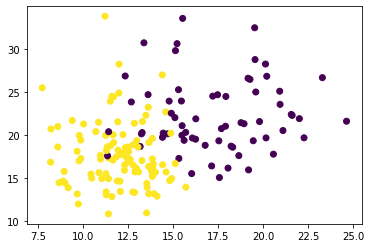

In [13]:
#Train the model using all features in the training sets
clf.fit(X_train, y_train)

#Predict the response for train dataset
y_pred = clf.predict(X_train)
# Model Accuracy: how often is the classifier correct?
print("Accuracy based on training set:",metrics.accuracy_score(y_train, y_pred))


#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy based on test set:",metrics.accuracy_score(y_test, y_pred))

plt.figure()
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred)

# This is much better than the classifiers created with fewer features.

### Part 2: K-means

Here we will make an unlabelled clustered dataset, and use K-means to try identify the clusters.
Run the code below to create and plot the clusters:

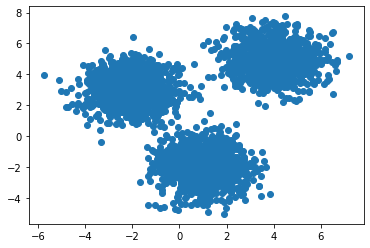

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
np.random.seed(0)
number_samples = 3000
centers = [[4, 5], [-2, 3], [1, -2]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=number_samples, centers=centers, cluster_std=1)
plt.figure()
plt.scatter(X[:,0],X[:,1])

Q7) Run the code below to use the K-means algorithm on the dataset. We seek 3 clusters of unknown position. The total sum of the squared distances to the cluster centres is also shown.

Squared distance of all data to nearest centre is 5795.945143


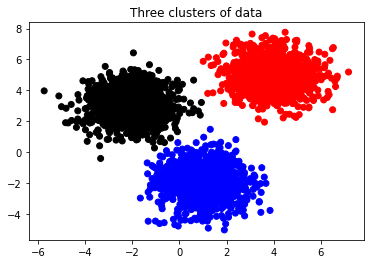

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Predict the cluster for all the samples
P = kmeans.predict(X)

color = [0] * number_samples #initialise list as zeros
for i in range(number_samples):
    if P[i] == 0:
        color[i] = 'red'
    elif P[i] == 1:
        color[i] = 'blue'
    else:
        color[i] = 'black'
        
# Generate scatter plot for data
plt.scatter(X[:,0], X[:,1], c=color, marker="o")

plt.title('Three clusters of data');
print('Squared distance of all data to nearest centre is {0:f}'.format(kmeans.inertia_))


Q8) Now copy, paste and amend the code to seek 4 clusters. What happens?

Squared distance of all data to nearest centre is 5141.651962


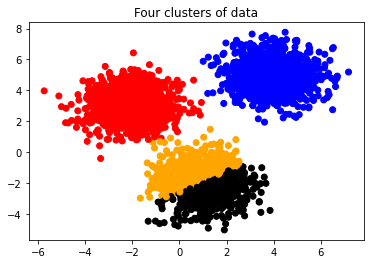

In [16]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Predict the cluster for all the samples
P = kmeans.predict(X)

color = [0] * number_samples #initialise list as zeros
for i in range(number_samples):
    if P[i] == 0:
        color[i] = 'red'
    elif P[i] == 1:
        color[i] = 'blue'
    elif P[i] == 2:
        color[i] = 'black'
    else:
        color[i] = 'orange'
# Generate scatter plot for data
plt.scatter(X[:,0], X[:,1], c=color, marker="o")

plt.title('Four clusters of data');
print('Squared distance of all data to nearest centre is {0:f}'.format(kmeans.inertia_))

Q9) Find the total squared distance between the data and the cluster centres for the number of clusters taking the values 1,2,3,4,5,6. Display your results as a trade off curve, with total squared distance on the y-axis and the number of clusters on the x-axis. Based on the "elbow" of the curve, how many clusters might you deduce there are solely from the data?


In [17]:
nc = [1,2,3,4,5,6]
total_squared_distance = np.zeros(len(nc))

for i in range(len(nc)):
    kmeans = KMeans(n_clusters=nc[i] )
    # ....
    # total_squared_distance[i] = ....
    

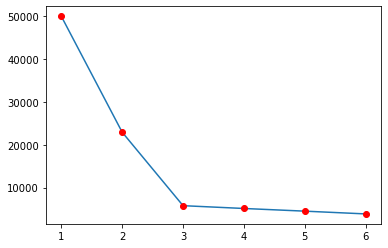

In [18]:
nc = [1,2,3,4,5,6]
total_squared_distance = np.zeros(len(nc))

for i in range(len(nc)):
    kmeans = KMeans(n_clusters=nc[i] )
    kmeans.fit(X)

# Predict the cluster for all the samples
    P = kmeans.predict(X)
    total_squared_distance[i] = kmeans.inertia_
    
plt.figure()
plt.plot( nc, total_squared_distance )
plt.plot( nc, total_squared_distance, 'o', color='red' )

In [19]:
# Based on the elbow, you need 3 clusters.